# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from pca import PCAScratch
from kmeans import KMeansScratch
from dbscan import DBSCANScratch

# Load Data

In [2]:
DATASET_PATH = '../../dataset'
DATASET_NAME = '/dataset2.csv'

In [3]:
df = pd.read_csv(DATASET_PATH + DATASET_NAME)

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Exploratory Data Analysis

## Statistics

In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# Data Preprocessing

## Missing values

In [6]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

No missing values

# Feature Engineering

In [7]:
df['BMI'] = df['Weight'] / (df['Height'] / 100) **2

Add BMI feature

## Categorical Data Encoding

In [8]:
label_encoder = LabelEncoder()

In [9]:
for col in df.select_dtypes(include = ['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Data Visualizations

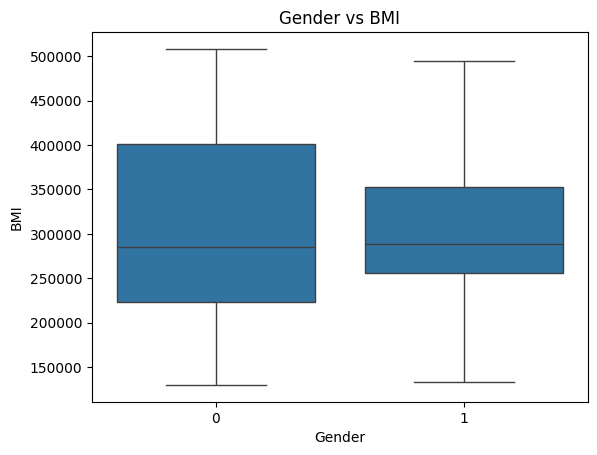

In [10]:
sns.boxplot(x = 'Gender', y = 'BMI', data = df)
plt.title('Gender vs BMI')
plt.show()

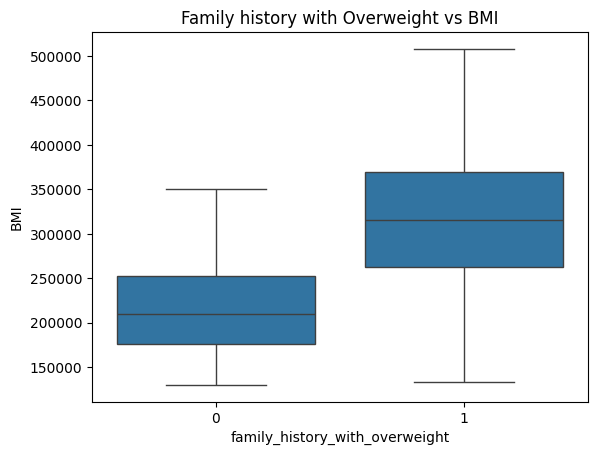

In [11]:
sns.boxplot(x = 'family_history_with_overweight', y = 'BMI', data = df)
plt.title('Family history with Overweight vs BMI')
plt.show()

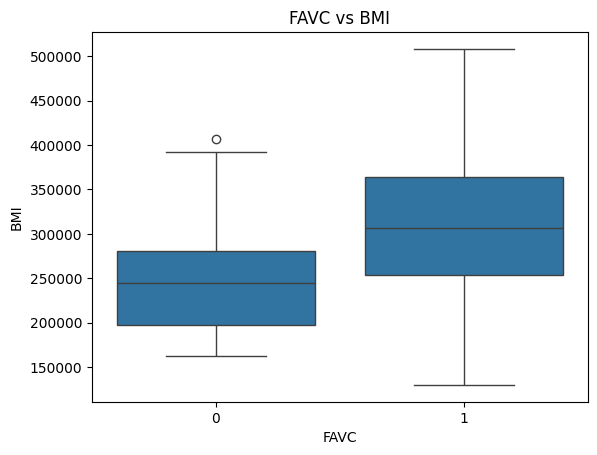

In [12]:
sns.boxplot(x = 'FAVC', y = 'BMI', data = df)
plt.title('FAVC vs BMI')
plt.show()

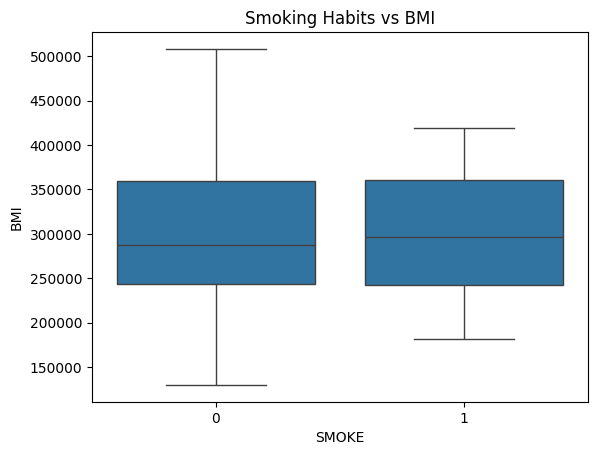

In [13]:
sns.boxplot(x = 'SMOKE', y = 'BMI', data = df)
plt.title('Smoking Habits vs BMI')
plt.show()

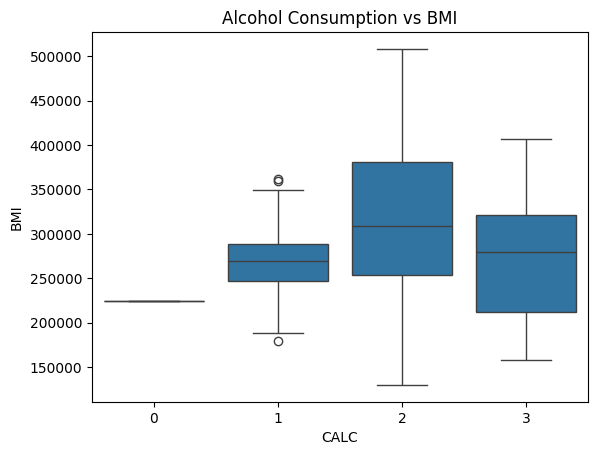

In [14]:
sns.boxplot(x = 'CALC', y = 'BMI', data = df)
plt.title('Alcohol Consumption vs BMI')
plt.show()

## Dimensionality Reduction with PCA

In [15]:
X = df.drop('NObeyesdad', axis = 1)

### Scratch

In [16]:
pca_scratch = PCAScratch(n_components = 2)

In [17]:
X_pca_scratch = pca_scratch.fit_transform(X)

In [18]:
pca_scratch.explained_variance_

array([6.41815203e+09, 8.71226477e+01])

In [19]:
pca_scratch.explained_variance_ratio_

array([9.99999980e-01, 1.35744129e-08])

### Library

In [20]:
pca = PCA(n_components = 2)

In [21]:
X_pca = pca.fit_transform(X)

In [22]:
pca.explained_variance_

array([6.41815203e+09, 8.71226477e+01])

In [23]:
pca.explained_variance_ratio_

array([9.99999980e-01, 1.35744129e-08])

In [24]:
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

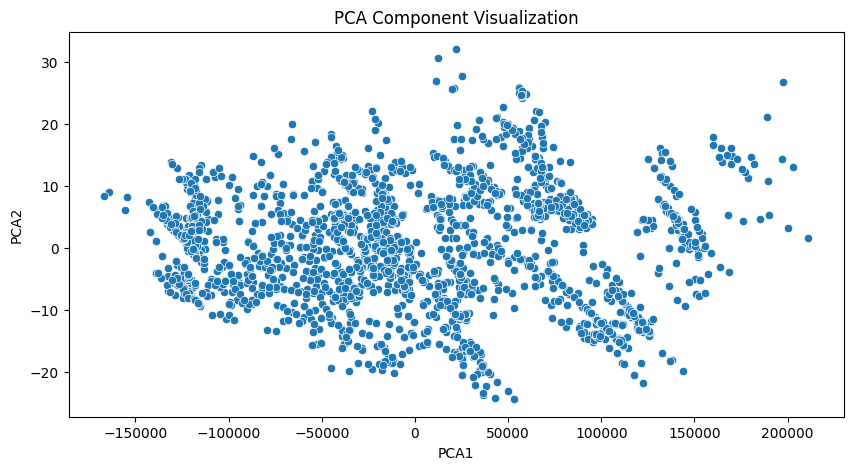

In [25]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'PCA1', y = 'PCA2', data = df)
plt.title('PCA Component Visualization')
plt.show()

# K-means

In [26]:
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.4f}")

For n_clusters = 2, the silhouette score is 0.5990
For n_clusters = 3, the silhouette score is 0.5945
For n_clusters = 4, the silhouette score is 0.6104
For n_clusters = 5, the silhouette score is 0.6078
For n_clusters = 6, the silhouette score is 0.6028
For n_clusters = 7, the silhouette score is 0.5971
For n_clusters = 8, the silhouette score is 0.6009
For n_clusters = 9, the silhouette score is 0.5959
For n_clusters = 10, the silhouette score is 0.6056


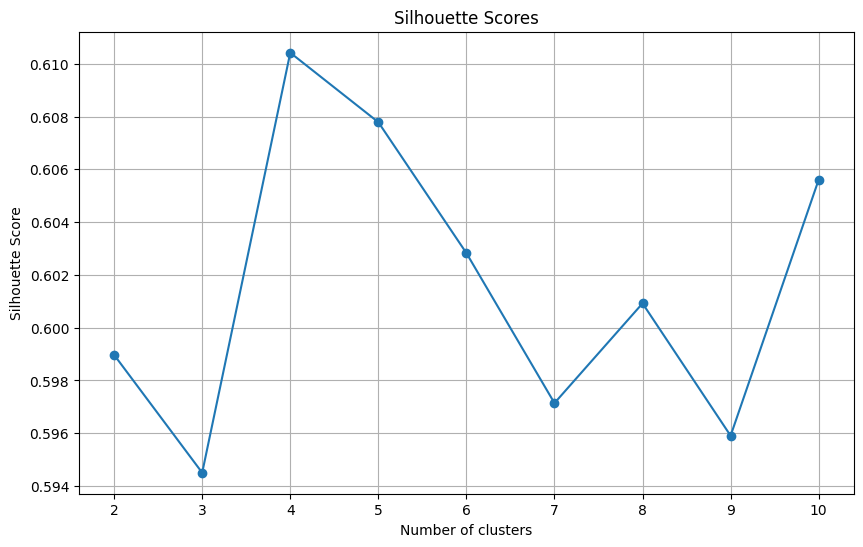

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [28]:
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters according to silhouette scores: {optimal_n_clusters}")

Optimal number of clusters according to silhouette scores: 4


## K-Means++ initializations

### Scratch

In [29]:
kmeans_pp_scratch = KMeansScratch(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300)
kmeans_pp_scratch.fit(X_pca)
clusters_pp_scratch = kmeans_pp_scratch.labels
df['KMeans_Cluster_PP_Scratch'] = clusters_pp_scratch

In [30]:
X_pca_df_pp_scratch = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

In [31]:
X_pca_df_pp_scratch['Cluster_PP_Scratch'] = clusters_pp_scratch

X_pca_df_pp_scratch['Cluster_PP_Scratch'] = X_pca_df_pp_scratch['Cluster_PP_Scratch'].astype('category')

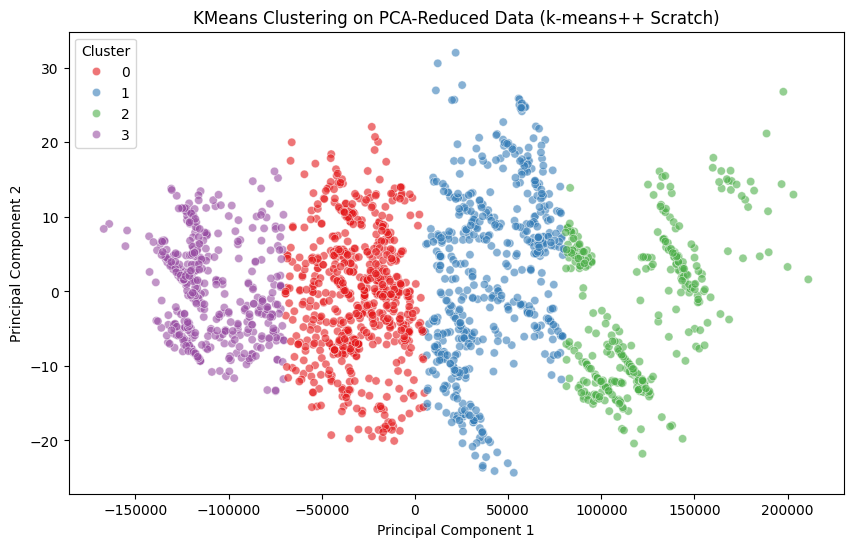

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_PP_Scratch', palette='Set1', data=X_pca_df_pp_scratch, legend='full', alpha=0.6)
plt.title('KMeans Clustering on PCA-Reduced Data (k-means++ Scratch)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### Library

In [33]:
kmeans_pp = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300)
clusters_pp = kmeans_pp.fit_predict(X_pca)
df['KMeans_Cluster_PP'] = clusters_pp

In [34]:
centroids_pp = kmeans_pp.cluster_centers_

In [35]:
X_pca_df_pp = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

In [36]:
X_pca_df_pp['Cluster_PP'] = clusters_pp

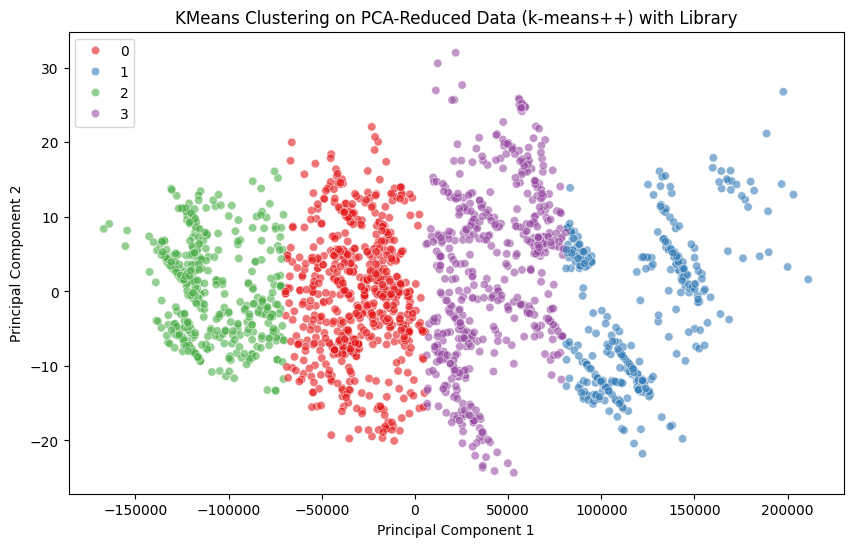

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_PP', palette='Set1', data = X_pca_df_pp, legend='full', alpha = 0.6)
plt.title('KMeans Clustering on PCA-Reduced Data (k-means++) with Library')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## Random initializations

### Scratch

In [38]:
kmeans_r_scratch = KMeansScratch(n_clusters=optimal_n_clusters, init='random', max_iter=300)
kmeans_r_scratch.fit(X_pca)
clusters_r_scratch = kmeans_r_scratch.labels
df['KMeans_Cluster_R_Scratch'] = clusters_r_scratch

In [39]:
X_pca_df_r_scratch = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

In [40]:
X_pca_df_r_scratch['Cluster_R_Scratch'] = clusters_r_scratch

X_pca_df_r_scratch['Cluster_R_Scratch'] = X_pca_df_r_scratch['Cluster_R_Scratch'].astype('category')

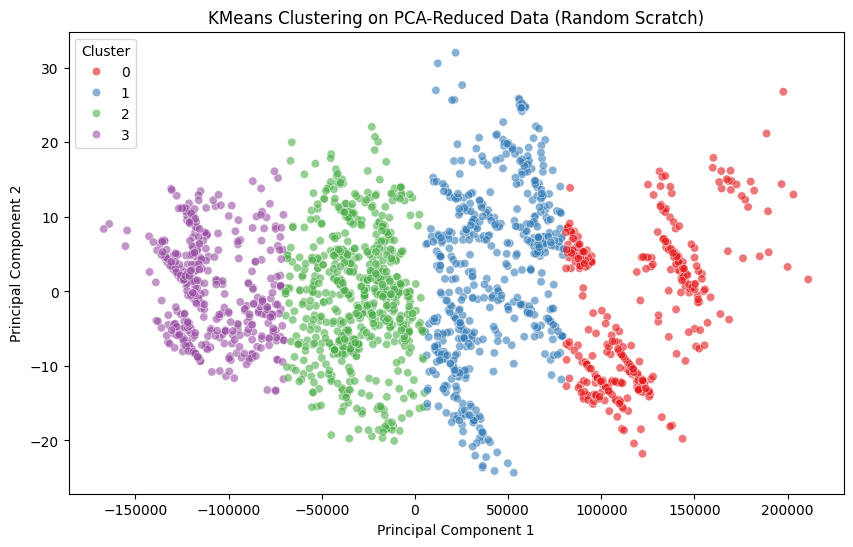

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_R_Scratch', palette='Set1', data=X_pca_df_r_scratch, legend='full', alpha=0.6)
plt.title('KMeans Clustering on PCA-Reduced Data (Random Scratch)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### Library

In [42]:
kmeans_r = KMeans(n_clusters=optimal_n_clusters, init='random', max_iter=300)
clusters_r = kmeans_r.fit_predict(X_pca)
df['KMeans_Cluster_R'] = clusters_r

In [43]:
centroids_r = kmeans_r.cluster_centers_

In [44]:
X_pca_df_r = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

In [45]:
X_pca_df_r['Cluster_R'] = clusters_r

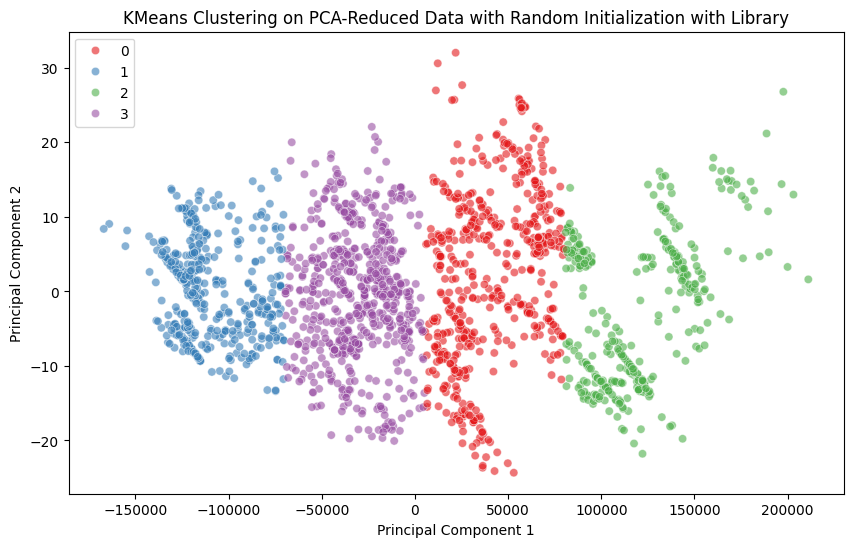

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_R', palette='Set1', data = X_pca_df_r, legend='full', alpha = 0.6)
plt.title('KMeans Clustering on PCA-Reduced Data with Random Initialization with Library')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

## Euclidean Metric

### Scratch

In [47]:
dbscan_euclidean_scratch = DBSCANScratch(epsilon = 5000, min_samples = 100, metric = 'euclidean')
dbscan_euclidean_scratch.fit(X_pca)

In [48]:
X_DBCAN_Euclidean_Scratch = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

X_DBCAN_Euclidean_Scratch['DBSCAN_Cluster_Euclidean'] = dbscan_euclidean_scratch.labels_

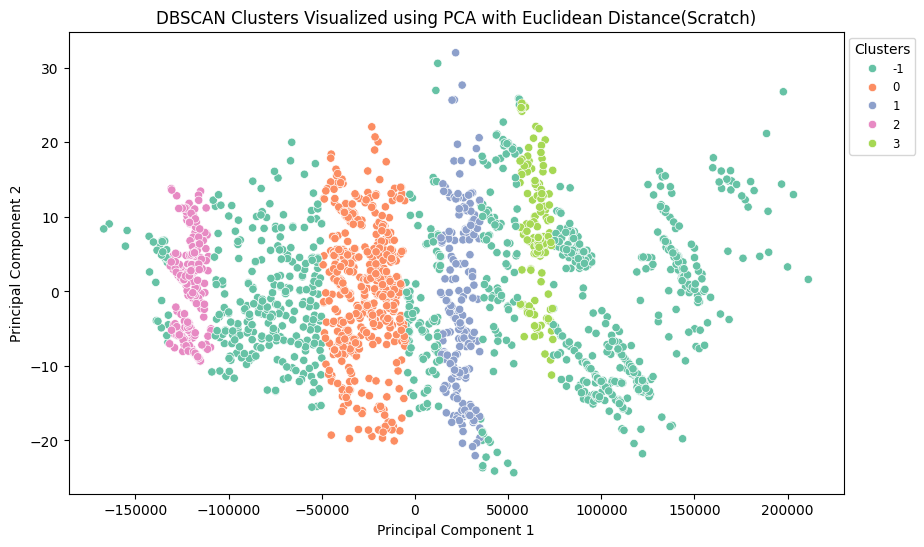

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster_Euclidean', data=X_DBCAN_Euclidean_Scratch, palette='Set2')
plt.title('DBSCAN Clusters Visualized using PCA with Euclidean Distance(Scratch)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', frameon=True)
plt.show()

### Library

In [50]:
dbscan_euclidean = DBSCAN(eps = 5000, min_samples = 100, metric = 'euclidean')
dbscan_labels_euclidean  = dbscan_euclidean.fit_predict(X_pca)
df['DBSCAN_Cluster_Euclidean'] = dbscan_labels_euclidean 

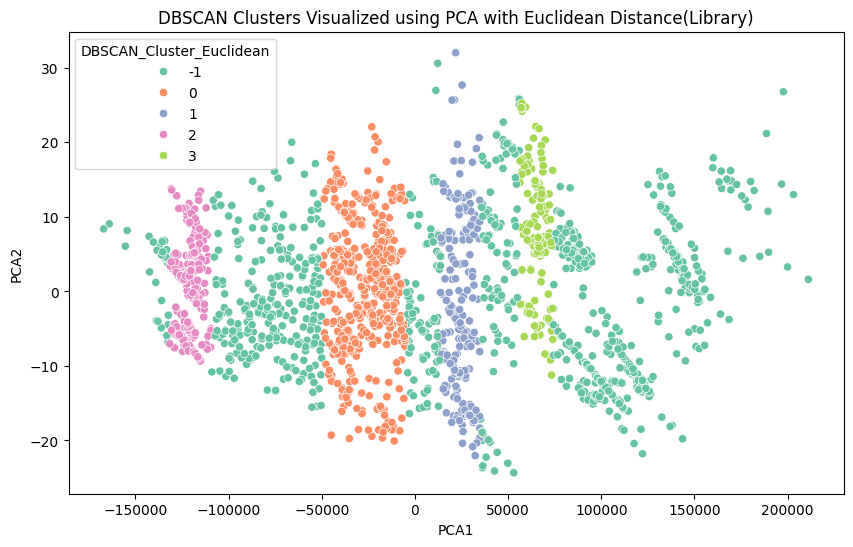

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster_Euclidean', data=df, palette='Set2')
plt.title('DBSCAN Clusters Visualized using PCA with Euclidean Distance(Library)')
plt.show()

## Manhattan Metric

### Scratch

In [52]:
dbscan_manhattan_scratch = DBSCANScratch(epsilon = 5000, min_samples = 100, metric = 'manhattan')
dbscan_manhattan_scratch.fit(X_pca)

In [53]:
X_DBCAN_Manhattan_Scratch = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

X_DBCAN_Manhattan_Scratch['DBSCAN_Cluster_Manhattan'] = dbscan_manhattan_scratch.labels_

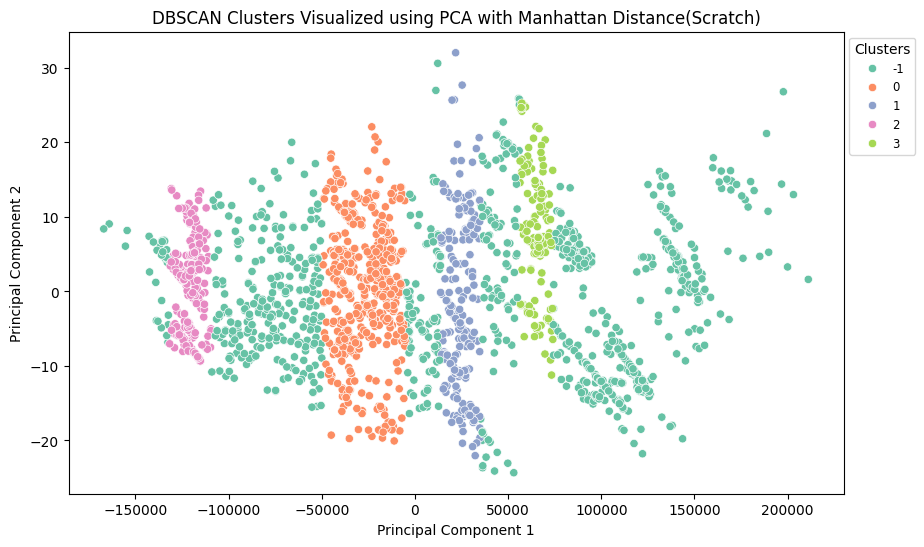

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster_Manhattan', data=X_DBCAN_Manhattan_Scratch, palette='Set2')
plt.title('DBSCAN Clusters Visualized using PCA with Manhattan Distance(Scratch)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', frameon=True)
plt.show()

### Library

In [55]:
dbscan_manhattan = DBSCAN(eps = 5000, min_samples = 100, metric = 'manhattan')
dbscan_labels_manhattan = dbscan_manhattan.fit_predict(X_pca)
df['DBSCAN_Cluster_Manhattan'] = dbscan_labels_manhattan

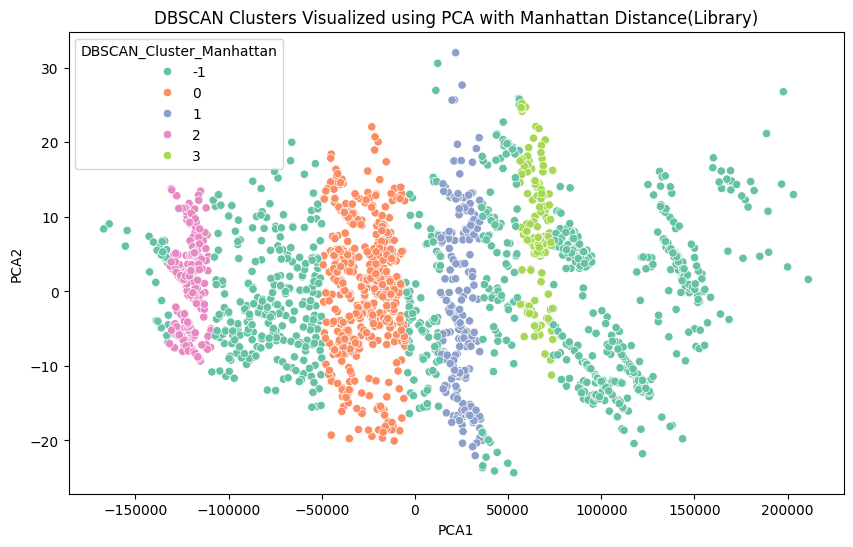

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster_Manhattan', data=df, palette='Set2')
plt.title('DBSCAN Clusters Visualized using PCA with Manhattan Distance(Library)')
plt.show()

## Minkowski Metric

### Scratch

In [57]:
dbscan_minkowski_scratch = DBSCANScratch(epsilon = 5000, min_samples = 100, metric = 'minkowski', p = 2)
dbscan_minkowski_scratch.fit(X_pca)

In [58]:
X_DBCAN_Minkowski_Scratch = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

X_DBCAN_Minkowski_Scratch['DBSCAN_Cluster_Minkowski'] = dbscan_minkowski_scratch.labels_

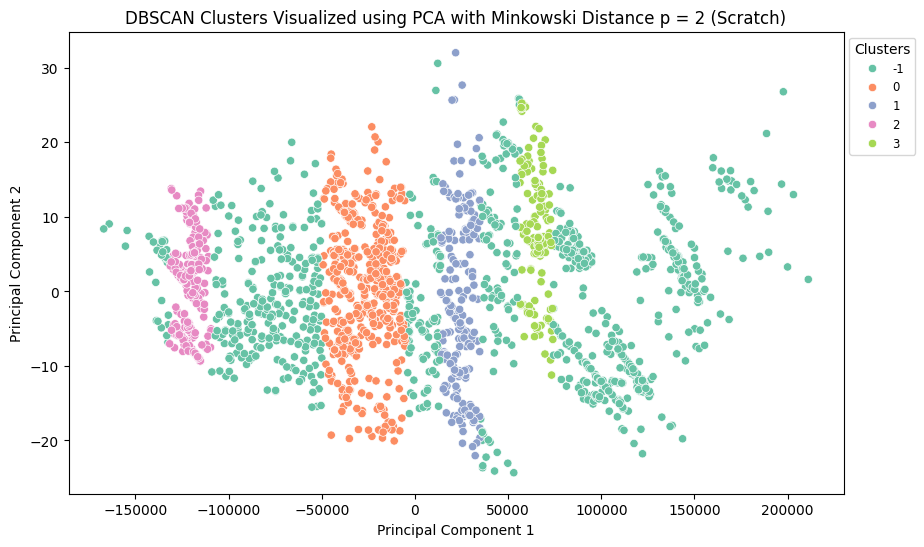

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster_Minkowski', data=X_DBCAN_Minkowski_Scratch, palette='Set2')
plt.title('DBSCAN Clusters Visualized using PCA with Minkowski Distance p = 2 (Scratch)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', frameon=True)
plt.show()

### Library

In [60]:
dbscan_minkowski = DBSCAN(eps = 5000, min_samples = 100, metric = 'minkowski', p = 2)
dbscan_labels_minkowski = dbscan_minkowski.fit_predict(X_pca)
df['DBSCAN_Cluster_Minkowski'] = dbscan_labels_minkowski

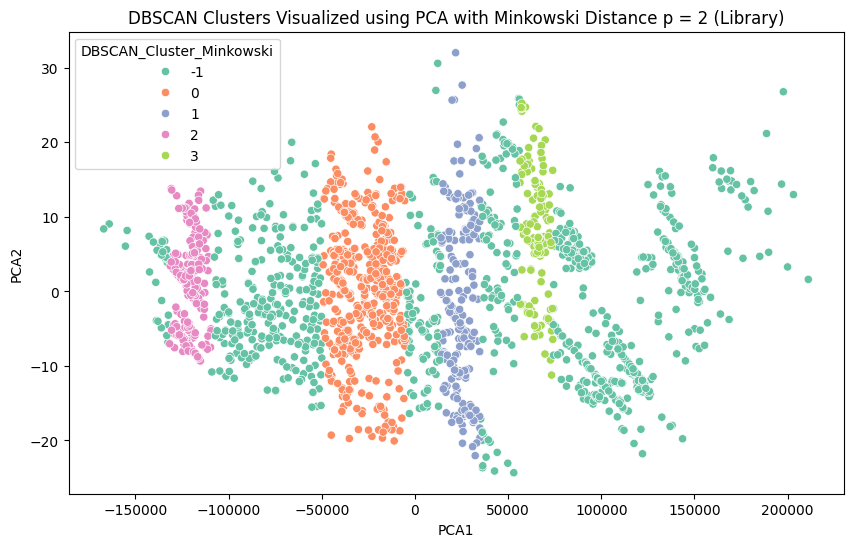

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster_Minkowski', data=df, palette='Set2')
plt.title('DBSCAN Clusters Visualized using PCA with Minkowski Distance p = 2 (Library)')
plt.show()